![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/taller_3/main/figs/taller-meca-aprendizaje%20no%20supervisado_banner%201169%20x%20200%20px%20-05.png)

# Caso-taller:  Recomendando Música

El objetivo de este caso-taller es construir un sistema de recomendación de Música utilizando los datos de [Last.fm](https://www.last.fm/) provistos  abiertamente por [grouplens](https://grouplens.org/about/what-is-grouplens/) para: **"avanzar la teoría y la práctica de la computación social mediante la construcción y la comprensión de sistemas *(de recomendación)* utilizados por personas reales".**

Los datos contienen información sobre artistas, usuarios, y las veces que estos escucharon sus canciones. Las bases se encuentran en los `Archivos de Laboratorio` en la carpeta `data`, allí también está disponible un archivo [README](data/readme.txt) que contiene más información sobre las bases.


## Instrucciones generales

1. Para desarrollar el *cuaderno*, primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos

En la carpeta `data` se encuentran los archivos:

   - `artists.dat`  que contienen el identificador del artista (`id`), nombre (`name`), link a la página del artista en last.fm (`url`), y link a la imagen del usuario (`pictureURL`), vale aclarar que varios de estos links están rotos.
   - `user_artists.dat`  que contiene identificador del usuario (`userID`), nombre del artista que escuchó (`artistID`), y las veces que los escuchó (`weight`).

Cargue estos datos en su *cuaderno*:

   1. Para la base de artistas seleccione las columnas de identificador de artista (`id`) y nombre (`name`). Renombre estas columnas para poder hacer la unión con la base `user_artists.dat`.
   2. Para la base de usuarios y artistas, renombre las columnas de forma tal que se mantenga la consistencia para unir con la base anterior, y renombre la columna `weight` a `nro_reproducciones`.
   3. Una estas bases.
   

In [1]:
# Cargamos los paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Cargamos los datos de la base artist y user_artist
artist = pd.read_csv('https://raw.githubusercontent.com/sebastian23escobar/Aprendizaje_no_supervisado/refs/heads/main/Taller3/data/artists.dat', sep='\t')
artist.head()

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [3]:
user_artist = pd.read_csv('https://raw.githubusercontent.com/sebastian23escobar/Aprendizaje_no_supervisado/refs/heads/main/Taller3/data/user_artists.dat', sep='\t')
user_artist.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [4]:
# Modificamos la base de datos para preservar solo las columnas id y name
artist = artist[['id', 'name']]

In [28]:
df = pd.merge(user_artist, artist, left_on='artistID', right_on='id', how='inner')
df = df[['userID', 'artistID',  'weight', "name"]]
df.columns = ['userID', 'artistID', 'nro_reproduciones', 'name'] 
df

,userID,artistID,nro_reproduciones,name
0,2,51,13883,Duran Duran
1,2,52,11690,Morcheeba
2,2,53,11351,Air
3,2,54,10300,Hooverphonic
4,2,55,8983,Kylie Minogue
...,...,...,...,...
92829,2100,18726,337,Nyktalgia
92830,2100,18727,297,Atsakau niekadA
92831,2100,18728,281,Domantas Razauskas
92832,2100,18729,280,Atalyja


Se cargaron las bases de datos, se seleccionaron las columnas de interes y luego se realizó un merge para unir las bases de datos quedando un dataframe con los datos de los id de usuarios y el nro de reproducciones de los artistas.

### 2. Análisis preliminar.

En esta sección exploraremos la base. Para ello responda las siguientes preguntas.

#### 2.1 ¿Cuantos usuarios y artistas hay en la base?


In [29]:
nusuarios = df['userID'].nunique()
nartistas = df['artistID'].nunique()
print('Hay', nusuarios, 'usuarios y', nartistas, 'artistas')

Hay 1892 usuarios y 17632 artistas


Hay 1892 usuarios y 17632 artistas


#### 2.2 ¿Cuáles es la distribución de probabilidad del consumo por artista? (haga el calculo sin ponderar y ponderando por el numero de reproducciones) ¿Qué podemos inferir a partir de la comparación de ambas?

In [30]:
# Hacemos el cálculo de la probabilidad del consumo por artista sin ponderar, es decir, en función de si un usuario escucho un artista pero sin tener en cuenta la cantidad de reproducciones.
frecuenciasartista = df['name'].value_counts()
distribucionartista = frecuenciasartista / frecuenciasartista.sum()

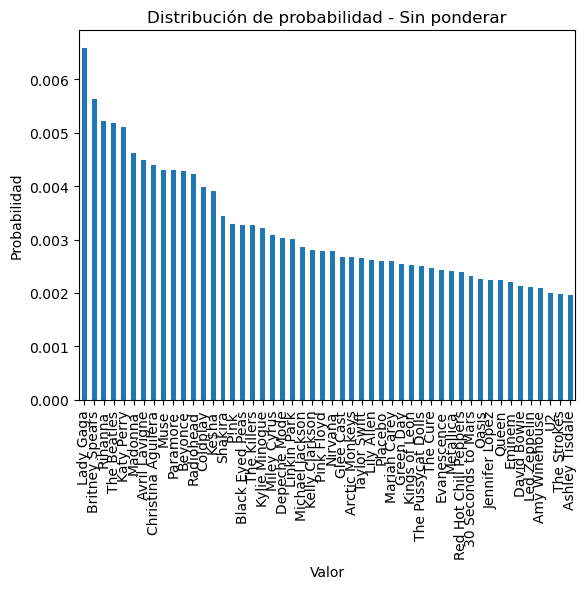

In [32]:
# Filtramos los primeros 50 artistas para poder visualizar mejor.
top_artistas = distribucionartista.nlargest(50)

top_artistas.plot(kind='bar')
plt.ylabel('Probabilidad')
plt.xlabel('Valor')
plt.title('Distribución de probabilidad - Sin ponderar')
plt.show()

### Ponderado por el numero de reproducciones

In [33]:
# Hacemos el cálculo de la probabilidad del consumo por artista sin ponderar, es decir, en función de si un usuario escucho un artista pero sin tener en cuenta la cantidad de reproducciones.
frecuenciasartistapond = df.groupby('name')['nro_reproduciones'].sum()
distribucionartistapond = frecuenciasartistapond / frecuenciasartistapond.sum()

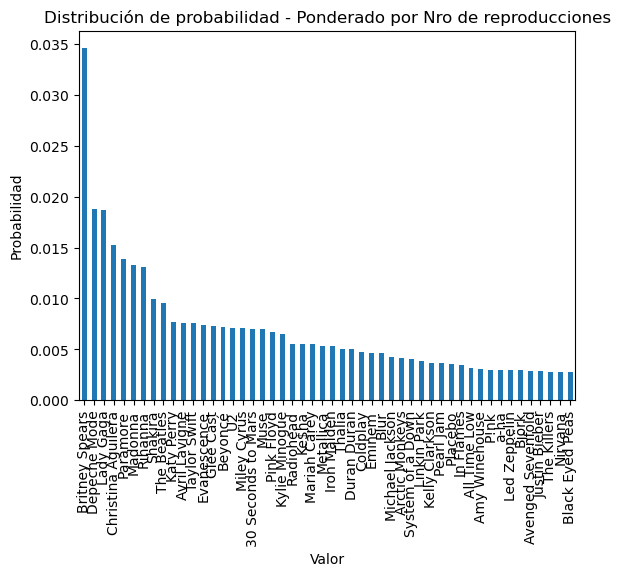

In [34]:
# Filtramos los primeros 50 artistas para poder visualizar mejor, con poderación.
top_artistapond = distribucionartistapond.nlargest(50)

top_artistapond.plot(kind='bar')
plt.ylabel('Probabilidad')
plt.xlabel('Valor')
plt.title('Distribución de probabilidad - Ponderado por Nro de reproducciones')
plt.show()

Se hizo el calculo de la probabilidad de consumo de los artistas, sin ponderación, es decir, solo teniendo en cuenta los usuarios que escucharon al artista al menos una vez, y con ponderación, es decir, teniendo en cuenta las veces que el artista fue reproducido por cada usuario. Como podemos apreciar en las gráficas de barras, ponderar si tienen un efecto sobre las probabilidades de consumo, por ejemplo, sin ponderar, Lady Gaga tiene una probabilidad de consumo superior al de Britney Spears (superior por poco, cerca de 0.001), sin embargo, teniendo en cuenta el nro de reproducciones, Britney Spear es la artista más escuchada aventajando notoriamente a Lady Gaga (superior por cerca de 0.016), de hecho, es Depeche Mode el segundo artista con mayor probabilidad de consumo.

#### 2.3 Para el usuario 8 (`userID==8`) ¿cuál es la distribución de reproducción de artistas basado en el número de reproducciones relativas?. Presente sus resultados usando tablas y/o gráficas. ¿Encuentra algún patrón en los artistas que escucha y las veces que reproduce? ¿Podemos decir algo de sus preferencias?


C:\Users\ypalacios\AppData\Local\Temp\ipykernel_19124\421903938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user8['pondrel'] = user8['nro_reproduciones'] / user8['nro_reproduciones'].sum()


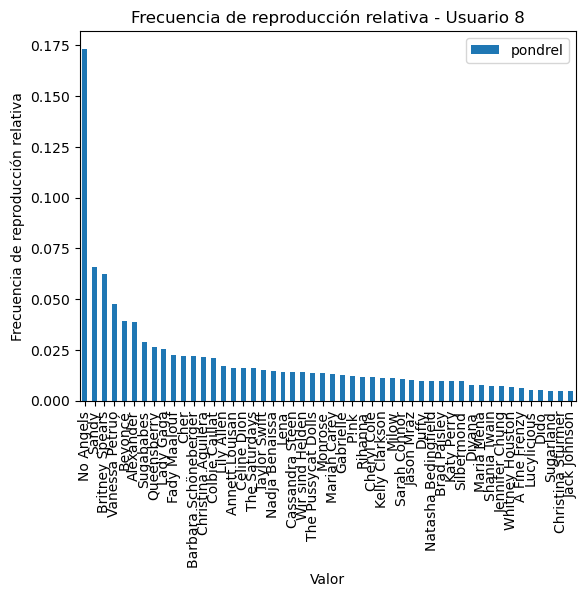

In [ ]:
# Hacemos el cálculo de la probabilidad del consumo por artista sin ponderar, es decir, en función de si un usuario escucho un artista pero sin tener en cuenta la cantidad de reproducciones.
user8 = df[df['userID'] == 8]
user8['pondrel'] = user8['nro_reproduciones'] / user8['nro_reproduciones'].sum()
user8 = user8[['name', 'pondrel']]
user8 = user8.sort_values(by='pondrel', ascending=False)
user8 = user8.set_index('name')

user8.plot(kind='bar')
plt.ylabel('Frecuencia de reproducción relativa')
plt.xlabel('Valor')
plt.title('Frecuencia de reproducción relativa - Usuario 8')
plt.show()

In [52]:
user8.tail(10)

,pondrel
name,
Maria Mena,0.007635
Shania Twain,0.007084
Jennifer Chung,0.006974
Whitney Houston,0.006478
A Fine Frenzy,0.006312
Lucylicious,0.005099
Dido,0.004989
Sugarland,0.004906
Christina Stürmer,0.004879


Como podemos apreciar en el gráfico de frecuencia anterior, los artistas más escuchados por el usuario 8 son artistas femeninos de música pop; sin embargo, en los menos escuchados tambien aparecen astistas pop pero mezclados con rock, country y folk.

### 3. Generando Recomendaciones

En esta sección nos interesa generar recomendaciones ***nuevas y relevantes*** para el usuario 8 (`userID==8`). Para ello vamos a generar distintos sistemas de recomendación y comparar las recomendaciones generadas.

#### 3.1. Filtrado colaborativo sencillo: promedios simples.

Usando el promedio simple basado en el número de usuarios que escucha un artista (sin considerar el número de veces que estos usuarios reproducen al artista) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones.

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.2.  Filtrado colaborativo sencillo: promedios ponderados.

Usando el promedio ponderado basado en el número de usuarios que escucha un artista  y ponderando  por el número de veces que estos usuarios reproducen al artista (`nro_reproducciones`) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.


In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.3.  Filtrado colaborativo sencillo: similitud de coseno.

Usando el promedio ponderado de reproducciones genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario. Para generar los pesos utilice la distancia de coseno. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.4.  Filtrado colaborativo usando SVD


Usando la descomposición en valores singulares (SVD) genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores.


In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.5.  Filtrado colaborativo usando Análisis de Canasta de Compra

Usando  el algoritmo `Apriori` genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores. Esto puede tomar mucho tiempo, sea cuidadoso al elegir los hiper-parámetors del modelo, utilice los resultados de las estadísticas descriptivas para elegir sus hier-parámetros, y genere solo reglas con 2 elementos. (Puede también aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 4. Recomendaciones generales

De acuerdo con los resultados encontrados, en su opinión ¿qué procedimiento generó las mejores recomendaciones para este usuario? ¿Cómo implementaría una evaluación objetiva de estas recomendaciones? Justifique su respuesta.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).